<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/LinearRegressionProblem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

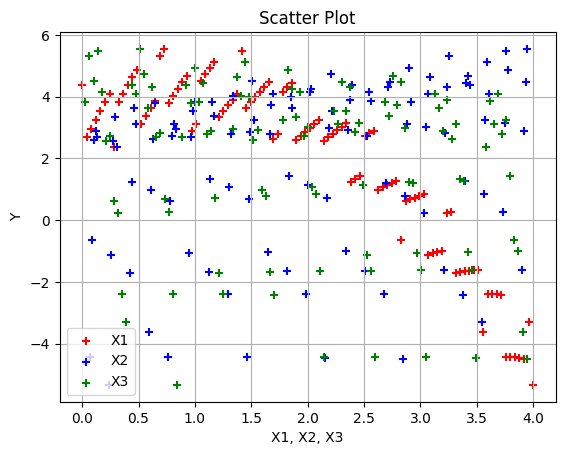

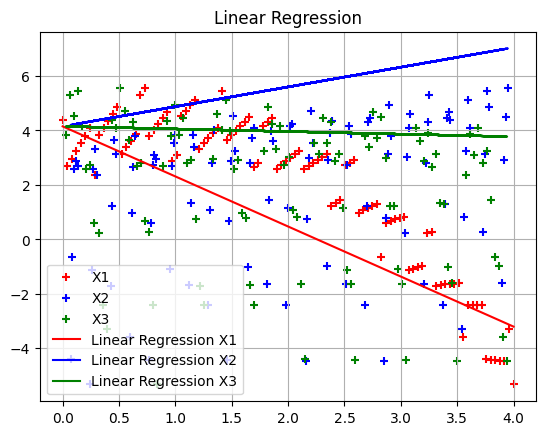

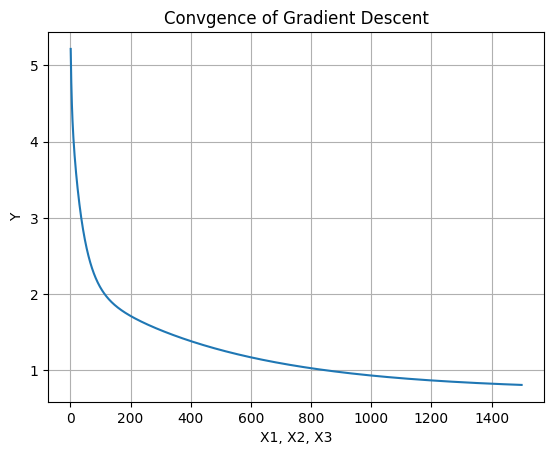

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/SelenaNahra/IntroMachineLearing/main/D3.csv'
df = pd.read_csv(url)


X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]
m = len(Y)

ones = np.ones((m,1)) #reshape
X1 = X1.reshape(m,1)
X2 = X2.reshape(m,1)
X3 = X3.reshape(m,1)

X = np.hstack((ones, X1, X2, X3)) #one matrix
theta = np.zeros(4)
alpha = 0.01
iteration = 1500

def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions,Y)
  sqrErrors = np.square(errors)
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

def gradient_descent(X, Y, theta, alpha, iteration):
  cost_history = np.zeros(iteration)
  for i in range(iteration):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha / m) * X.transpose().dot(errors)
    theta -= sum_delta
    cost_history[i] = compute_cost(X, Y, theta)

  return theta, cost_history

theta, cost_history = gradient_descent(X, Y, theta, alpha, iteration)

X_1 = np.hstack((ones, X1))
X_2 = np.hstack((ones, X2))
X_3 = np.hstack((ones, X3))

theta1 = np.hstack((theta[0], theta[1]))
theta2 = np.hstack((theta[0], theta[2]))
theta3 = np.hstack((theta[0], theta[3]))

#scatter plot
plt.scatter(X1, Y, color = 'red', marker = '+', label = 'X1')
plt.scatter(X2, Y, color = 'blue', marker = '+', label = 'X2')
plt.scatter(X3, Y, color = 'green', marker = '+', label = 'X3')
plt.legend()
plt.grid(True)
plt.xlabel('X1, X2, X3')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()


#scatter plot
plt.scatter(X1, Y, color = 'red', marker = '+', label = 'X1')
plt.scatter(X2, Y, color = 'blue', marker = '+', label = 'X2')
plt.scatter(X3, Y, color = 'green', marker = '+', label = 'X3')
#linear regression plot
plt.plot(X_1[:, 1], X_1.dot(theta1), color = 'red', label = 'Linear Regression X1')
plt.plot(X_2[:, 1], X_2.dot(theta2), color = 'blue', label = 'Linear Regression X2')
plt.plot(X_3[:, 1], X_3.dot(theta3), color = 'green', label = 'Linear Regression X3')

plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()
plt.xlabel('X1, X2, X3')
plt.ylabel('Y')


#convergence plot
plt.plot(range(1, iteration+1), cost_history);

plt.title("Convgence of Gradient Descent")
plt.grid(True)
plt.show()